# Tarea 09 Resampling.

# Ejercicio 1.

### Derivación de la Asignación Óptima de Portafolio

Nuestro objetivo es encontrar el valor de $\alpha$ que minimiza la varianza del portafolio, definida como:

$$\text{Var}(\alpha X + (1-\alpha)Y)$$

Utilizando las propiedades de la varianza ($\text{Var}(aX+bY) = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2ab\text{Cov}(X,Y)$), expandimos la ecuación:

$$f(\alpha) = \alpha^2 \sigma_X^2 + (1-\alpha)^2 \sigma_Y^2 + 2\alpha(1-\alpha) \sigma_{XY}$$

Donde:
* $\sigma_X^2 = \text{Var}(X)$
* $\sigma_Y^2 = \text{Var}(Y)$
* $\sigma_{XY} = \text{Cov}(X,Y)$

### Derivar con respecto a $\alpha$

Para encontrar el mínimo, tomamos la derivada de $f(\alpha)$ respecto a $\alpha$ y aplicamos la regla de la cadena:

$$\frac{d}{d\alpha} f(\alpha) = \frac{d}{d\alpha}(\alpha^2 \sigma_X^2) + \frac{d}{d\alpha}((1-\alpha)^2 \sigma_Y^2) + \frac{d}{d\alpha}(2\alpha(1-\alpha) \sigma_{XY})$$

Calculamos cada término:
1. $\frac{d}{d\alpha}(\alpha^2 \sigma_X^2) = 2\alpha \sigma_X^2$
2. $\frac{d}{d\alpha}((1-\alpha)^2 \sigma_Y^2) = 2(1-\alpha)(-1)\sigma_Y^2 = -2(1-\alpha)\sigma_Y^2$
3. $\frac{d}{d\alpha}(2(\alpha - \alpha^2) \sigma_{XY}) = 2(1 - 2\alpha)\sigma_{XY}$

Sustituimos de vuelta en la ecuación de la derivada:

$$\frac{df}{d\alpha} = 2\alpha \sigma_X^2 - 2(1-\alpha)\sigma_Y^2 + 2(1-2\alpha)\sigma_{XY}$$

#### Igualar a cero y despejar $\alpha$

Para encontrar el punto crítico, igualamos la derivada a 0:

$$2\alpha \sigma_X^2 - 2(1-\alpha)\sigma_Y^2 + 2(1-2\alpha)\sigma_{XY} = 0$$

Podemos dividir toda la ecuación entre 2 para simplificar:

$$\alpha \sigma_X^2 - (1-\alpha)\sigma_Y^2 + (1-2\alpha)\sigma_{XY} = 0$$

Expandimos los términos:

$$\alpha \sigma_X^2 - \sigma_Y^2 + \alpha \sigma_Y^2 + \sigma_{XY} - 2\alpha \sigma_{XY} = 0$$

Agrupamos los términos que contienen $\alpha$ en el lado izquierdo y movemos los demás a la derecha:

$$\alpha \sigma_X^2 + \alpha \sigma_Y^2 - 2\alpha \sigma_{XY} = \sigma_Y^2 - \sigma_{XY}$$

Factorizamos $\alpha$:

$$\alpha (\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) = \sigma_Y^2 - \sigma_{XY}$$

Finalmente, despejamos $\alpha$:

$$\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$$

Esto demuestra que el valor de $\alpha$ coincide con la ecuación (5.6).

# Ejercicio 2.



### (a) Probabilidad de que la primera observación bootstrap no sea la  j-ésima observación

$1 - \frac{1}{n}$

#### Ya que la probabilidad de seleccionar la observación específica $j$ es $\frac{1}{n}$, por tanto la p de que no sea la j esima observación es el complemento.

---

### (b) Probabilidad de que la segunda observación bootstrap no sea la j-ésima observación

$1 - \frac{1}{n}$

##### Es lo mismo e independiente de cada observación ya que no se mofifica el conjunto de datos originales, es decir, se puede volver a repetir cada una.
---

### (c) La probabilidad de que la j-ésima observación no esté en la muestra bootstrap es $(1 - 1/n)^n$
Para que $j$ no esté en la muestra, no debe ser escogida en la primera extracción,  tampoco en la 2ª, ...,  tampoco en la enésima.



$$
= \left(1 - \frac{1}{n}\right)^n
$$

---

### (d) Cálculo para $n=5$


$$P(\text{Esté en la muestra}) = 1 - \left(1 - \frac{1}{5}\right)^5$$
$$= 1 - (0.8)^5$$
$$= 1 - 0.32768$$

$= 0.672$

---

### (e) Cálculo para $n=100$

$$P(\text{Esté en la muestra}) = 1 - \left(1 - \frac{1}{100}\right)^{100}$$
$$= 1 - (0.99)^{100}$$
$$= 1 - 0.36603$$

$= 0.632$

---

### (f) Cálculo para $n=10,000$

$$P(\text{Está en la muestra}) = 1 - \left(1 - \frac{1}{10,000}\right)^{10,000}$$


 $= 0.632$



### (g) Gráfico de Probabilidad vs $n$

**Comentario:** Esto demuestra que, en grandes conjuntos de datos, una muestra bootstrap típica contiene aproximadamente el **63.2%** de las observaciones originales únicas, mientras que el **36.8%** restante queda fuera de la muestra (conocidas como observaciones *Out-of-Bag* u OOB).

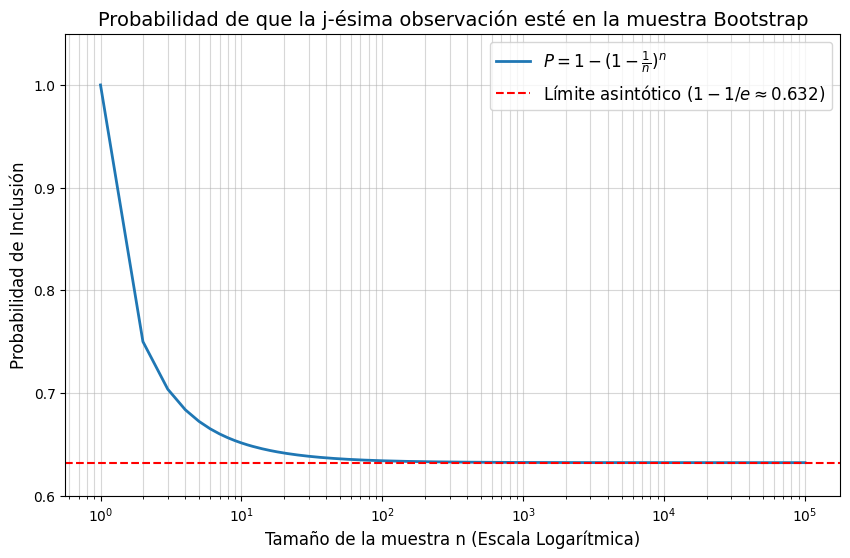

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bootstrap_probability():
    n = np.arange(1, 100001)
    probabilidad = 1 - (1 - 1.0/n)**n
    plt.figure(figsize=(10, 6))
    plt.plot(n, probabilidad, label=r'$P = 1 - (1 - \frac{1}{n})^n$', linewidth=2)
    limite_teorico = 1 - 1/np.e
    plt.axhline(y=limite_teorico, color='red', linestyle='--', 
                label=f'Límite asintótico ($1 - 1/e \\approx {limite_teorico:.3f}$)')
    plt.xscale('log') 
    plt.ylim(0.6, 1.05) 
    
    plt.title('Probabilidad de que la j-ésima observación esté en la muestra Bootstrap', fontsize=14)
    plt.xlabel('Tamaño de la muestra n (Escala Logarítmica)', fontsize=12)
    plt.ylabel('Probabilidad de Inclusión', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, which="both", ls="-", alpha=0.5)

    # Mostrar gráfico
    plt.show()

if __name__ == "__main__":
    plot_bootstrap_probability()

Como podemos ver entonces, el límite y la asíntota se encuentra en 63.2%, esto significa que una muestra contiene 63.2% de los datos originales.

---

### (h)

In [82]:
import numpy as np
store = np.empty(10000)
for i in range(10000):
    sample = np.random.choice(np.arange(1, 101), size=100, replace=True)
    in_sample = np.sum(sample == 4) > 0
    store[i] = in_sample
resultado = np.mean(store)

print(f"Probabilidad estimada: {resultado}")

Probabilidad estimada: 0.6401


Esto confirma esta convergencia.

# Ejercicio 3.

Se divide aleatoriamente el conjunto de observaciones en k particiones del dataset iguales. Se hace un ciclo for k veces, en cada iteración, se deja una partición diferente como test y se utilizan las k-1 particiones restantes para el train del modelo. Se calcula el error del modelo (MSE) sobre el test. Cuando acabas las iteraciones, se calcula el promedio de los errores obtenidos en cada una para estimar el global.

Ventaja de k folds:

-Estabilidad en el modelo (te aseguras de que ningún dato importante que quede fuera del train lo dejes al azar)

Desventaja: 

Costo computacional por las iteraciones.

Comparado con leave one out, la ventaja es la precisión de verificar la estabilidad, sin embargo muchas veces no vale la pena porque el costo computacional si tienes muchos datos es muy grande.

# Ejercicio 4.

Para estimar la desviación estándar de una predicción con boostrap:


Generar muestras: Se generan muestras seleccionando observaciones aleatoriamente con posibilidad a repetirse.



Ajustar el modelo: Se ajusta el modelo a cada una de las muestras.

Realizar predicciones: Para el valor específico de X, se calcula la predicción de Y
  utilizando cada uno de los modelos ajustados. Esto genera muchas estimaciones diferentes.

Calculamos la desviación estándar de las predicciones y esta es la estimación de la desviación estándar de nuestra predicción. 

# Ejercicio 5.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

a)

In [84]:

default =pd.read_csv('Default.csv')
X= default[['balance', 'income']]
y = default['default'].map({'Yes': 1, 'No': 0})
regl = LogisticRegression()
regl.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


b)

i.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


ii.

In [86]:
regl.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


iii.

In [87]:
y_pred = regl.predict(X_test)

iv.

In [88]:
fl = np.mean(y_pred != y_test)
print(f'tasa de fallos: {fl:.4f}')

tasa de fallos: 0.0230


c)

In [89]:
ListaTasaDeFallos=[]
PorcenTestUtilizado=[]
for i in [0.1,0.3,0.4]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=12)
    regl.fit(X_train, y_train)
    y_pred = regl.predict(X_test)
    fl = np.mean(y_pred != y_test)
    print(f'tasa de fallos: {fl:.4f}')
    ListaTasaDeFallos.append(fl)
    PorcenTestUtilizado.append(i)
print(ListaTasaDeFallos[0], PorcenTestUtilizado[0])
print(ListaTasaDeFallos[1], PorcenTestUtilizado[1])
print(ListaTasaDeFallos[2], PorcenTestUtilizado[2])

tasa de fallos: 0.0270
tasa de fallos: 0.0260
tasa de fallos: 0.0262
0.027 0.1
0.026 0.3
0.02625 0.4


Se comportan muy similar, apenas existe diferencia si cambiamos el tamaño de train.

d)

In [90]:
default['student']=default['student'].map({'Yes': 1, 'No': 0})
X1= default[['balance', 'income','student']]
y1 = default['default'].map({'Yes': 1, 'No': 0})
regl1 = LogisticRegression()
regl1.fit(X1, y1)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [91]:
ListaTasaDeFallos=[]
PorcenTestUtilizado=[]
for i in [0.1,0.2,0.3,0.4]:
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=i, random_state=12)
    regl1.fit(X_train, y_train)
    y_pred = regl1.predict(X_test)
    fl = np.mean(y_pred != y_test)
    print(f'tasa de fallos: {fl:.4f}')
    ListaTasaDeFallos.append(fl)
    PorcenTestUtilizado.append(i)
print(ListaTasaDeFallos[0], PorcenTestUtilizado[0])
print(ListaTasaDeFallos[1], PorcenTestUtilizado[1])
print(ListaTasaDeFallos[2], PorcenTestUtilizado[2])
print(ListaTasaDeFallos[3], PorcenTestUtilizado[3])

tasa de fallos: 0.0270
tasa de fallos: 0.0230
tasa de fallos: 0.0270
tasa de fallos: 0.0272
0.027 0.1
0.023 0.2
0.027 0.3
0.02725 0.4


Como podemos ver, tampoco cambia practicamente nada aunque aumentemos el tamaño de train, puede significar que la variable student no aporta a la predicción.

# Ejercicio 6.

a)

In [92]:
X = default[['balance', 'income']]
X = sm.add_constant(X)
y = default['default'].map({'Yes': 1, 'No': 0})
modelo_sm = sm.GLM(y, X)
resultado = modelo_sm.fit()
print(resultado.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                        0.028217
Method:                          IRLS   Log-Likelihood:                 3651.3
Date:                Fri, 28 Nov 2025   Deviance:                       282.08
Time:                        14:05:19   Pearson chi2:                     282.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1316
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0922      0.006    -15.936      0.0

b)

In [100]:
def boot_fn(data, indices):
    sample = data.iloc[indices]
    X_sample = sample[['balance', 'income']]
    y_sample = sample['default'].map({'Yes': 1, 'No': 0})
    model = sm.GLM(y_sample, sm.add_constant(X_sample))
    result = model.fit()
    return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]

c)

In [102]:
boot_fn(default, np.arange(len(default)))
print(f"intercept coef: {boot_fn(default, np.arange(len(default)))[0]:.4f}")
print(f"balance coef: {boot_fn(default, np.arange(len(default)))[1]:.4f}")
print(f"income coef: {boot_fn(default, np.arange(len(default)))[2]:.4f}")
print(f"intercept std err: {boot_fn(default, np.arange(len(default)))[3]:.4f}")
print(f"balance std err: {boot_fn(default, np.arange(len(default)))[4]:.4f}")
print(f"income std err: {boot_fn(default, np.arange(len(default)))[5]:.4f}")

intercept coef: -0.0922
balance coef: 0.0001
income coef: 0.0000
intercept std err: 0.0058
balance std err: 0.0000
income std err: 0.0000


C:\Users\mateo\AppData\Local\Temp\ipykernel_25208\3141363086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]
C:\Users\mateo\AppData\Local\Temp\ipykernel_25208\3141363086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]
C:\Users\mateo\AppData\Local\Temp\ipykernel_25208\3141363086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always

Podemos ver que son los mismos errores estándar, esto nos sirve para sacar estos intervalos con fuerza bruta, ya que, cuando lo sacamos con summary, tienen en cuenta asumpciones como homocedasticidad, normalidad, etc. De esta forma podemos verificar que el los errores estándar son válidos.

# Ejercicio 7.

In [106]:
from ISLP import load_data
Weekly = load_data('Weekly')
print(Weekly.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up


a)

In [107]:

X= Weekly[['Lag1', 'Lag2']]
y= Weekly['Direction'].map({'Up': 1, 'Down': 0}).astype(int)

regl7= LogisticRegression()
regl7.fit(X, y)

print("Sklearn LogisticRegression")
print("Intercept:", regl7.intercept_)
print("Coefficients (Lag1, Lag2):", regl7.coef_.ravel())


X_sm = sm.add_constant(X)
modelo_sm = sm.Logit(y, X_sm)
weeklyfit= modelo_sm.fit(disp=False)
print("\nStatsmodels Logit summary:")
print(weeklyfit.summary())

Sklearn LogisticRegression
Intercept: [0.22122423]
Coefficients (Lag1, Lag2): [-0.03869725  0.06020635]

Statsmodels Logit summary:
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                0.005335
Time:                        14:38:57   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342

b)

In [108]:

X_removed = X.iloc[1:]
y_removed = y.iloc[1:]

regl7_removed = LogisticRegression()
regl7_removed.fit(X_removed, y_removed)

print("Sklearn LogisticRegression")
print("Intercept:", regl7_removed.intercept_)
print("Coefficients (Lag1, Lag2):", regl7_removed.coef_.ravel())

X_sm_dropped = sm.add_constant(X_removed)
modelo_sm_weekly_dropped = sm.Logit(y_removed, X_sm_dropped)
resultado_weekly_dropped = modelo_sm_weekly_dropped.fit(disp=False)
print("\nStatsmodels Logit summary:")
print(resultado_weekly_dropped.summary())

Sklearn LogisticRegression
Intercept: [0.22324303]
Coefficients (Lag1, Lag2): [-0.03840843  0.06080518]

Statsmodels Logit summary:
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                0.005387
Time:                        14:50:48   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
Covariance Type:            nonrobust   LLR p-value:                   0.01785
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.000       0.103       0.344

c)

In [110]:

primera_obs = X.iloc[[0]].copy()
y_real = y.iloc[0]


primera_obs.insert(0, 'const', 1.0) 

probabilidad = resultado_weekly_dropped.predict(primera_obs)
prob_valor = probabilidad.iloc[0]

prediccion_clase = 1 if prob_valor > 0.5 else 0

print(f"Probabilidad predicha para la Obs 1: {prob_valor:.4f}")
print(f"Clase Predicha: {'Up' if prediccion_clase == 1 else 'Down'} ({prediccion_clase})")
print(f"Clase Real:     {'Up' if y_real == 1 else 'Down'} ({y_real})")

if prediccion_clase == y_real:
    print("Conclusión: La observación fue clasificada CORRECTAMENTE.")
else:
    print("Conclusión: La observación fue clasificada INCORRECTAMENTE.")

Probabilidad predicha para la Obs 1: 0.5714
Clase Predicha: Up (1)
Clase Real:     Down (0)
Conclusión: La observación fue clasificada INCORRECTAMENTE.


d)

In [113]:
import numpy as np
import statsmodels.api as sm

error_list = []
n = len(X)


for i in range(n):
    X_train = X.drop(X.index[i])
    y_train = y.drop(y.index[i])
    
   
    X_test = X.iloc[[i]]
    y_test = y.iloc[i]
    
   
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test, has_constant='add')
    

    model = sm.Logit(y_train, X_train_sm).fit(disp=0)
    
   
    prob_up = model.predict(X_test_sm).iloc[0]
 
    pred_label = 1 if prob_up > 0.5 else 0
    

    if pred_label != y_test:
        error_list.append(1) 
    else:
        error_list.append(0) 

print(f"Total de errores: {sum(error_list)}")

Total de errores: 490


Esto significa que de las 1089 semanas el modelo tuvo 490 errores usando Leave one out.

# Ejercicio 8.

a)

In [115]:
# Generar datos.
np.random.seed(1)
x = np.random.normal(size=100)
y = x - 2 * x**2 + np.random.normal(size=100)

df = pd.DataFrame({'x': x, 'y': y})

In [116]:
df.head()

,x,y
0,1.624345,-4.099779
1,-0.611756,-0.135741
2,-0.528172,-0.682611
3,-1.072969,-2.781913
4,0.865408,-1.727365


b)

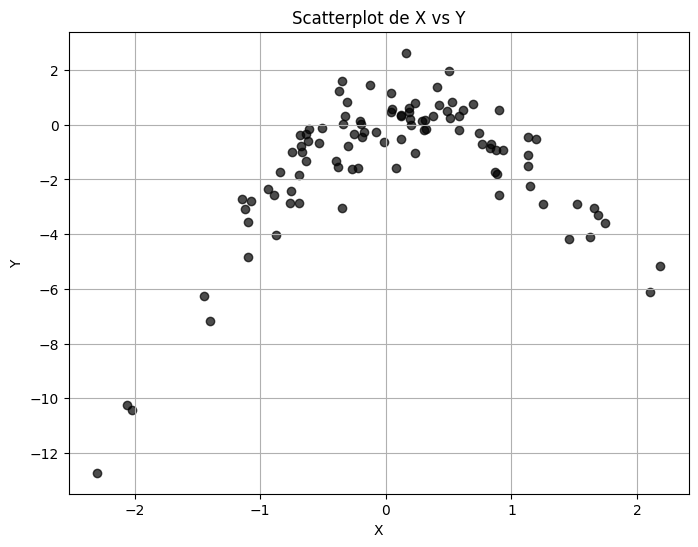

In [117]:
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='black', alpha=0.7)
plt.title('Scatterplot de X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

c y d)

In [118]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut, cross_val_score

In [120]:
def calcular_loocv(semilla=None):
    if semilla:
        np.random.seed(semilla)
    
    loo = LeaveOneOut()
    resultados = {}
    

    for grado in [1, 2, 3, 4]:
        
        poly = PolynomialFeatures(degree=grado)
        X_poly = poly.fit_transform(df[['x']])
        
        modelo = LinearRegression()
        
        
        scores = cross_val_score(modelo, X_poly, df['y'], cv=loo, scoring='neg_mean_squared_error')
        
        
        mse_loocv = np.mean(-scores)
        resultados[grado] = mse_loocv
        
    return resultados

print("c")
errores_c = calcular_loocv(semilla=1)
for grado, error in errores_c.items():
    print(f"Grado {grado}: MSE = {error:.4f}")

print("d (Otra semilla) ")
errores_d = calcular_loocv(semilla=42) 
for grado, error in errores_d.items():
    print(f"Grado {grado}: MSE = {error:.4f}")

c
Grado 1: MSE = 6.2608
Grado 2: MSE = 0.9143
Grado 3: MSE = 0.9269
Grado 4: MSE = 0.8669
d (Otra semilla) 
Grado 1: MSE = 6.2608
Grado 2: MSE = 0.9143
Grado 3: MSE = 0.9269
Grado 4: MSE = 0.8669


Podemos ver que sí son iguales, esto es porque leave one out cross validation no elige grupos aleatorios de datos, revisa uno por uno y hace una regresión para cada uno, esto hace que el promedio de errores siempre sea el mismo.

e)

Como los datos solo tienen una curva, un modelo cuadratico es suficiente para explicar esta relación. Los demás modelos simplemente tendrán un ligero cambio y un ligero efecto en x cúbica o cuarta, o incluso serán 0. Por eso, es muy poca la diferencia, y corres el riesgo de sobreajustar o de hacer demasiado complejo el modelo si lo haces de mayor grado.

f)

In [121]:
import statsmodels.api as sm

X_poly_4 = pd.DataFrame({
    'const': 1,
    'x': df['x'],
    'x2': df['x']**2,
    'x3': df['x']**3,
    'x4': df['x']**4
})

modelo_sm = sm.OLS(df['y'], X_poly_4).fit()
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     163.0
Date:                Fri, 28 Nov 2025   Prob (F-statistic):           1.24e-41
Time:                        15:16:56   Log-Likelihood:                -130.63
No. Observations:                 100   AIC:                             271.3
Df Residuals:                      95   BIC:                             284.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3140      0.136      2.311      0.0

Esto comprueba lo que mencione en el inciso e. Los términos cúbico y cuarto no son significativos en el modelo con 99% de confianza.

# Ejercicio 9.

In [122]:
from sklearn.utils import resample
import scipy.stats as st

Boston = load_data('Boston')
medv = Boston['medv']
n = len(medv)

print(f"Total de observaciones n: {n}")

Total de observaciones n: 506


In [123]:
medv.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

a), b), c) y d)

In [125]:

mu_hat = medv.mean()
print(f"(a) Media estimada (mu_hat): {mu_hat:.4f}")

se_formula = medv.std() / np.sqrt(n)
print(f"(b) Error Estándar (Fórmula): {se_formula:.4f}")

np.random.seed(12)
bootstrap_means = []

for _ in range(1000):
    sample = resample(medv, replace=True, n_samples=n)
    bootstrap_means.append(sample.mean())

se_bootstrap = np.std(bootstrap_means)
print(f"(c) Error Estándar (Bootstrap): {se_bootstrap:.4f}")

lower_boot = mu_hat - 2 * se_bootstrap
upper_boot = mu_hat + 2 * se_bootstrap

t_interval = st.t.interval(0.95, df=n-1, loc=mu_hat, scale=se_formula)

print(f"\n(d) Comparación de Intervalos de Confianza 95%:")
print(f"    Bootstrap: [{lower_boot:.4f}, {upper_boot:.4f}]")
print(f"    t-test:    [{t_interval[0]:.4f}, {t_interval[1]:.4f}]")

(a) Media estimada (mu_hat): 22.5328
(b) Error Estándar (Fórmula): 0.4089
(c) Error Estándar (Bootstrap): 0.4242

(d) Comparación de Intervalos de Confianza 95%:
    Bootstrap: [21.6845, 23.3811]
    t-test:    [21.7295, 23.3361]


Como podemos ver, con boostrap logramos obtener casi los mismos intervalos de confianza teóricos, con la ventaja de que no dependes de que tus datos cumplan con las asumpciones teóricas de los intervalos de confianza.

e y f)

In [126]:

med_hat = medv.median()
print(f"\n(e) Mediana estimada: {med_hat}")

np.random.seed(12)
bootstrap_medians = []

for _ in range(1000):
    sample = resample(medv, replace=True, n_samples=n)
    bootstrap_medians.append(sample.median())

se_boot_med = np.std(bootstrap_medians)
print(f"(f) Error Estándar de la Mediana (Bootstrap): {se_boot_med:.4f}")


(e) Mediana estimada: 21.2
(f) Error Estándar de la Mediana (Bootstrap): 0.3779


g y h)

In [127]:

p10_hat = np.percentile(medv, 10)
print(f"\n(g) Percentil 10 estimado: {p10_hat}")

np.random.seed(12)
bootstrap_p10 = []

for _ in range(1000):
    sample = resample(medv, replace=True, n_samples=n)
    bootstrap_p10.append(np.percentile(sample, 10))

se_boot_p10 = np.std(bootstrap_p10)
print(f"(h) Error Estándar del Percentil 10 (Bootstrap): {se_boot_p10:.4f}")


(g) Percentil 10 estimado: 12.75
(h) Error Estándar del Percentil 10 (Bootstrap): 0.5078


Como podemos ver en el caso de la mediana y del percentil 10 como ejemplo, se vuelve mucho más sencillo obtener estas medidas con fuerza bruta que de forma teórica, por lo que ya mencioné, las asumpciones de la teoría no siempre se van a cumplir.